# Лабораторная работа 6. Кластеризация (DBSCAN, OPTICS)

## Выполнение

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [5]:
data = pd.read_csv('CC GENERAL.csv').iloc[:,1:].dropna()
data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


### DBSCAN

Стандартизируем данные, так как разные признаки лежат в разных шкалах

In [6]:
data = np.array(data, dtype='float')
min_max_scaler = preprocessing.StandardScaler()
scaled_data = min_max_scaler.fit_transform(data)

Проведем кластеризацию методов DBSCAN при параметрах по умолчанию.

In [4]:
clustering = DBSCAN().fit(scaled_data)

print(set(clustering.labels_))
print(len(set(clustering.labels_)) - 1)
print(list(clustering.labels_).count(-1) / len(list(clustering.labels_)))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, -1}
36
0.7512737378415933


Описание параметров DBSCAN:
    - eps: максимальное расстояние между двумя соседями
    - min_samples: число соседей в окрестности точки, необходимое для того, чтобы она считалась базовой (точка входит в подсчет)
    - metric: метрика, которая используется для вычисления расстояния
    - metric_params: дополнительные аргументы ключевого слова для метрической функции (по умолчанию их нет)
    - algorithm: алгоритм, который используется для нахождения ближних соседей для вычисления точечных расстояний
    - leaf_size: размер листа
    - p: степени метрики Минковского, которая будет использоваться для вычисления расстояния между точками
    - n_jobs: количество параллельных заданий для запуска.    

In [10]:
eps_ = np.arange(0.01, 2.0, 0.1)
info = []
for eps in eps_:
    clustering = DBSCAN(eps=eps).fit(scaled_data)
    labels_set = set(clustering.labels_)
    info.append([len(labels_set) - 1, list(clustering.labels_).count(-1) / len(list(clustering.labels_))])

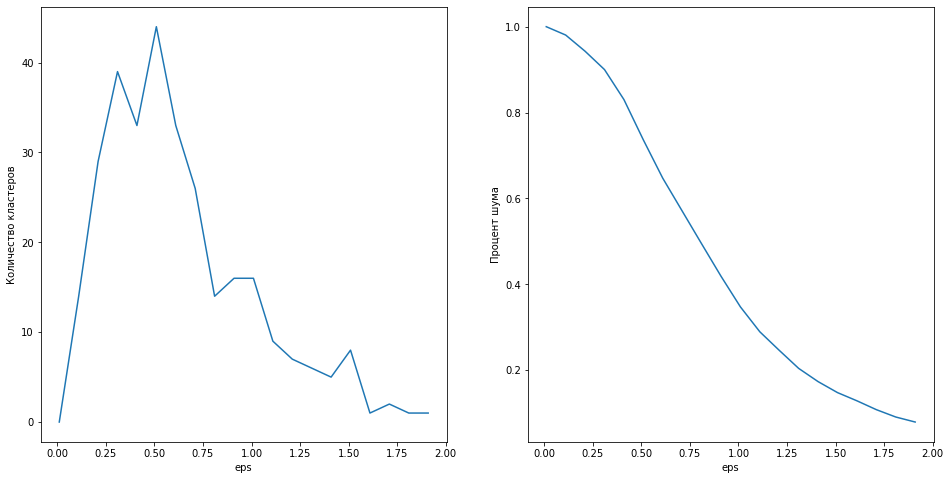

In [11]:
info = np.array(info)
fig, ax = plt.subplots(1, 2, figsize=(16,8))
ax[0].plot(eps_, info[:,0])
ax[0].set_xlabel('eps')
ax[0].set_ylabel('Количество кластеров')
ax[1].plot(eps_, info[:,1])
ax[1].set_xlabel('eps')
ax[1].set_ylabel('Процент шума')

plt.show()

Постройте график количества кластеров и процента не кластеризованных наблюдений
в зависимости от минимального значения количества точек, образующих кластер.


In [14]:
samples = np.arange(2, 15, 1)
info = []
for sample in samples:
    clustering = DBSCAN(min_samples=sample).fit(scaled_data)
    labels_set = set(clustering.labels_)
    info.append([len(labels_set) - 1, list(clustering.labels_).count(-1) / len(list(clustering.labels_))])

Text(0, 0.5, 'Процент шума')

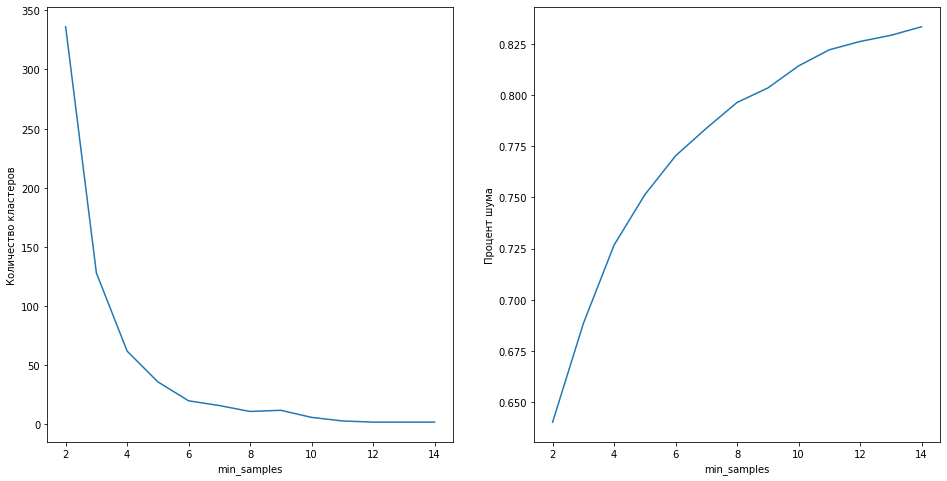

In [16]:
info = np.array(info)
fig, ax = plt.subplots(1, 2, figsize=(16,8))
ax[0].plot(samples, info[:,0])
ax[0].set_xlabel('min_samples')
ax[0].set_ylabel('Количество кластеров')
ax[1].plot(samples, info[:,1])
ax[1].set_xlabel('min_samples')
ax[1].set_ylabel('Процент шума')

Определите значения параметров, при котором количество кластеров получается от 5
до 7, и процент не кластеризованных наблюдений не превышает 12%

In [7]:
eps_range = np.arange(0.1, 3, 0.4)
min_samples_range = np.arange(1, 15, 2)

dbscan_df = pd.DataFrame(columns=['min samples', 'eps', 'clusters', 'noise'])

for min_samples in min_samples_range:
    for eps in eps_range:
        clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(scaled_data)
        n_clusters = len(set(clustering.labels_)) - 1
        percent_noises = list(clustering.labels_).count(-1) / len(list(clustering.labels_))
        dbscan_df = dbscan_df.append(
            {'min samples': min_samples, 'eps': eps, 'clusters': n_clusters, 'noise': percent_noises},
            ignore_index=True)


new_data = dbscan_df[(dbscan_df.clusters >= 5) & (dbscan_df.clusters <= 7) & (dbscan_df.noise <= 0.12)]
new_data

,min samples,eps,clusters,noise
15,3.0,2.9,5.0,0.022233


Понизьте размерность данных до 2 при используя метод главных компонент

In [19]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data)
pca.explained_variance_ratio_

clustering = DBSCAN(eps=2, min_samples=3, n_jobs=-1).fit(scaled_data)

In [22]:
core_samples_mask = np.zeros_like(clustering.labels_, dtype=bool)
core_samples_mask[clustering.core_sample_indices_] = True
labels = clustering.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

unique_labels = set(labels)
unique_labels.remove(-1)
unique_labels = [-1, *list(unique_labels)]
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

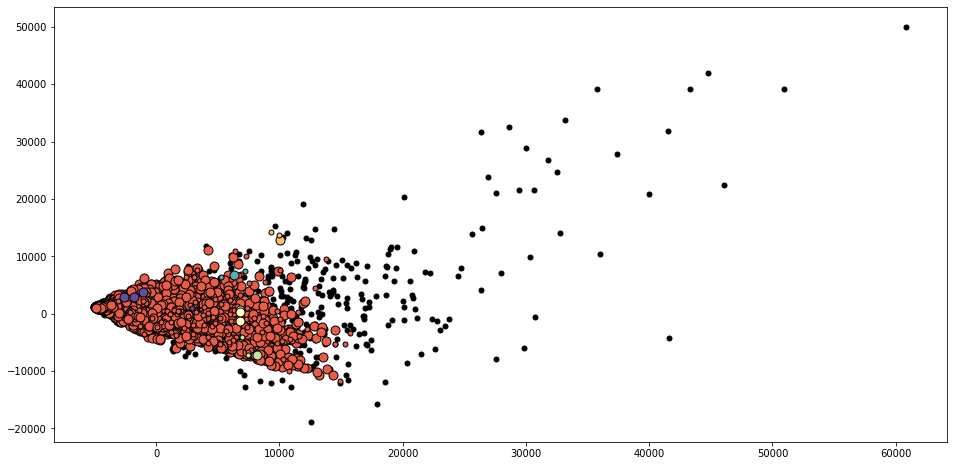

In [21]:
plt.figure(figsize=(16, 8))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = reduced_data[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=9)

    xy = reduced_data[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=5)

### OPTICS

Параметры OPTICS:

Найдите такие параметры метода OPTICS (*max_eps *и min_samples) при которых, чтобы
получить результаты близкие к результатам DBSCAN из пункта 6

In [25]:
clustering = OPTICS(max_eps=1.7, min_samples=4, cluster_method='dbscan').fit(scaled_data)

labels = clustering.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(n_clusters_)

5


In [ ]:
Отличие OPTICS от DBSCAN?

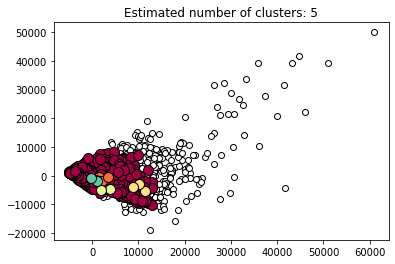

In [28]:
pca_data = PCA(n_components=2).fit_transform(data)
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

xy = pca_data[(labels == -1)]
plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor='w',
         markeredgecolor='k', markersize=6)

for k, col in zip(unique_labels, colors):
    if k == -1:
        continue

    class_member_mask = (labels == k)

    xy = pca_data[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=10)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [29]:
from sklearn.cluster import cluster_optics_dbscan
import matplotlib.gridspec as gridspec

def show_optics(clust):
    labels_050 = cluster_optics_dbscan(reachability=clust.reachability_,
                                       core_distances=clust.core_distances_,
                                       ordering=clust.ordering_, eps=0.5)
    labels_200 = cluster_optics_dbscan(reachability=clust.reachability_,
                                       core_distances=clust.core_distances_,
                                       ordering=clust.ordering_, eps=2)

    space = np.arange(len(scaled_data))
    reachability = clust.reachability_[clust.ordering_]
    labels = clust.labels_[clust.ordering_]

    plt.figure(figsize=(10, 7))
    G = gridspec.GridSpec(2, 3)
    ax1 = plt.subplot(G[0, :])
    ax2 = plt.subplot(G[1, 0])
    ax3 = plt.subplot(G[1, 1])
    ax4 = plt.subplot(G[1, 2])

    # Reachability plot
    colors = ['g.', 'r.', 'b.', 'y.', 'c.']
    for klass, color in zip(range(0, 5), colors):
        Xk = space[labels == klass]
        Rk = reachability[labels == klass]
        ax1.plot(Xk, Rk, color, alpha=0.3)
    ax1.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha=0.3)
    ax1.plot(space, np.full_like(space, 2., dtype=float), 'k-', alpha=0.5)
    ax1.plot(space, np.full_like(space, 0.5, dtype=float), 'k-.', alpha=0.5)
    ax1.set_ylabel('Reachability (epsilon distance)')
    ax1.set_title('Reachability Plot')

    # OPTICS
    colors = ['g.', 'r.', 'b.', 'y.', 'c.']
    ax2.plot(pca_data[clust.labels_ == -1, 0], pca_data[clust.labels_ == -1, 1], 'k+', alpha=0.1)
    for klass, color in zip(range(0, 5), colors):
        Xk = pca_data[clust.labels_ == klass]
        ax2.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
    ax2.set_title('Automatic Clustering\nOPTICS')

    # DBSCAN at 0.5
    colors = ['g', 'greenyellow', 'olive', 'r', 'b', 'c']
    ax3.plot(pca_data[labels_050 == -1, 0], pca_data[labels_050 == -1, 1], 'k+', alpha=0.1)
    for klass, color in zip(range(0, 6), colors):
        Xk = pca_data[labels_050 == klass]
        ax3.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3, marker='.')
    ax3.set_title('Clustering at 0.5 epsilon cut\nDBSCAN')

    # DBSCAN at 2.
    colors = ['g.', 'm.', 'y.', 'c.']
    for klass, color in zip(range(0, 4), colors):
        Xk = pca_data[labels_200 == klass]
        ax4.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
    ax4.plot(pca_data[labels_200 == -1, 0], pca_data[labels_200 == -1, 1], 'k+', alpha=0.1)
    ax4.set_title('Clustering at 2.0 epsilon cut\nDBSCAN')

    plt.tight_layout()
    plt.show()

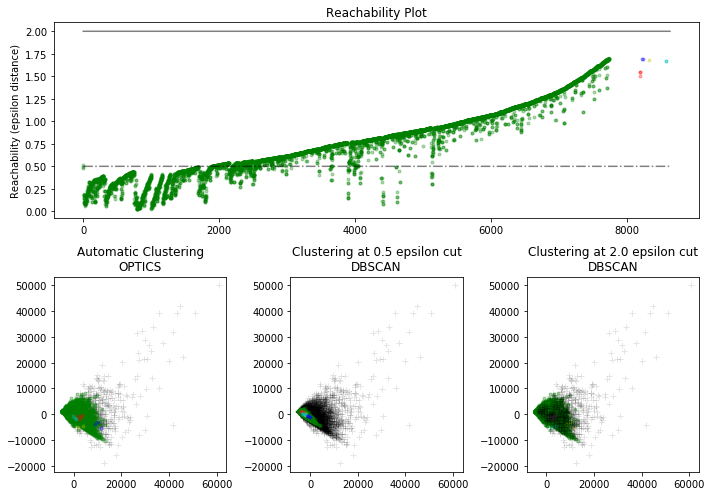

In [30]:
show_optics(clustering)

In [ ]:
metrics = ['cityblock', 'cosine', 'chebyshev', 'l1', 'l2']
for metric in metrics:
    clustering = OPTICS(min_samples=3, max_eps=2, n_jobs=-1, cluster_method="dbscan", metric=metric).fit(scaled_data)
    num_of_clusters = len(set(clustering.labels_)) - 1
    not_classified = list(clustering.labels_).count(-1) / len(list(clustering.labels_))
    print('clusters: {}, not classified: {:.2f}'.format(num_of_clusters, not_classified))
    show_optics(clustering)